# Unit 9. ML

Задание.

- Обучить модель по примеру и сериализовать её.
- Десериализовать модель в коде сервера, загружая её только один раз при старте (это важно, иначе предсказание будет слишком долгим).
- Написать функцию, которая будет принимать запрос с числом, отправлять это число в модель и выводить результат на экран.

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations
from scipy.stats import ttest_ind

import pandas as pd
import pandas_profiling
import numpy as np
import pickle
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Загрузим данные

In [25]:
d = load_diabetes()

In [26]:
print(d['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [65]:
df = pd.DataFrame(data = d['data'], columns=d['feature_names'])
df['target'] = d['target']

cols = df.columns
df

age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  target  
0   -0.002592  0.019908 -0.017646   151.0  
1   -0.039493 -0.068330 -0.092204    75.0  
2   -0.002592  0.002864 -0.025930   141.0  
3    0.034309  0.022692 -0.009362   206.0  
4   -0.002592 -0.031991 -0.046641   135.0  
..        ...       ...       ...     ...  
437 -0.002592  0.031193  0.007207   178.0  
438  0.034309 -0.018118  0.044485   104.0  
439 -0.011080 -0.046879  0.015491   132.0  
440  0.026560  0.044528 -0.025930   220.0  
441 -0.039493 -0.004220  0.003064    57.0  

[442 rows x 11 columns]

**Сделаем быстрое исследование датасета**

In [28]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Подготовим датасет к обучению

In [66]:
X = df.drop(['target'],1)
Y = df['target']

Нам желательно получить только один-два лучших признака, для удобства. Судя по корреляции, этоbmi и s5.  Но проверим это с помощью цикл и оценки модели

Оценки:
- Mean squared error - чем ближе к 0, тем лучше.
- Coefficient of determination - приемлемо, если от 0.5 до 1, модель хорошая, если от 0.8 до 1

In [67]:
cols = cols[:-1]


age :
Coefficients: 
 [323.57449776]
Mean squared error: 5256.09
Coefficient of determination: 0.03


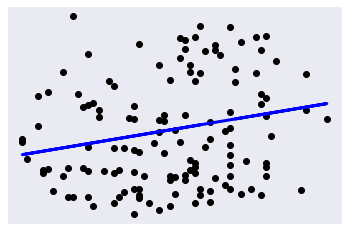

sex :
Coefficients: 
 [5.7448485]
Mean squared error: 5427.26
Coefficient of determination: -0.01


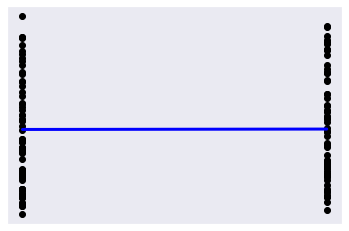

bmi :
Coefficients: 
 [988.41931249]
Mean squared error: 3884.94
Coefficient of determination: 0.28


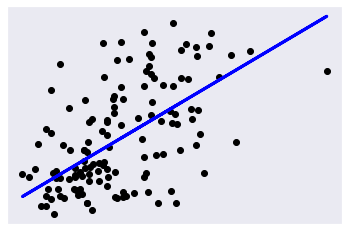

bp :
Coefficients: 
 [730.93498498]
Mean squared error: 4436.93
Coefficient of determination: 0.18


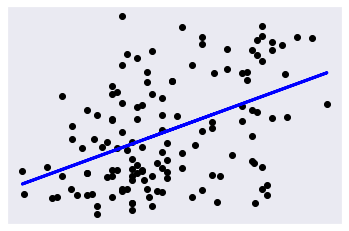

s1 :
Coefficients: 
 [305.33203098]
Mean squared error: 5051.23
Coefficient of determination: 0.06


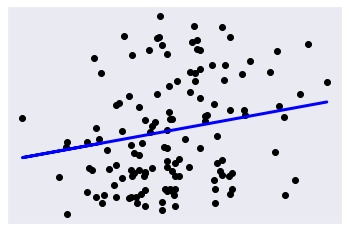

s2 :
Coefficients: 
 [260.13590478]
Mean squared error: 5196.59
Coefficient of determination: 0.04


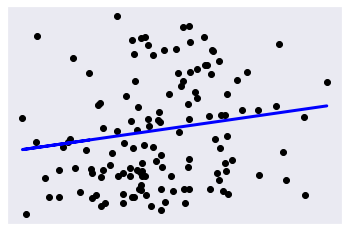

s3 :
Coefficients: 
 [-665.71169085]
Mean squared error: 4672.81
Coefficient of determination: 0.13


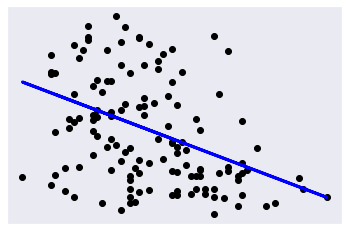

s4 :
Coefficients: 
 [695.3867005]
Mean squared error: 4413.00
Coefficient of determination: 0.18


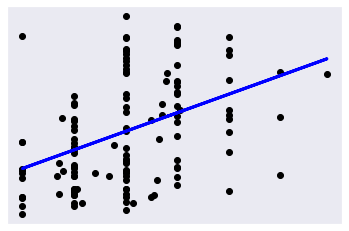

s5 :
Coefficients: 
 [856.04696824]
Mean squared error: 3044.51
Coefficient of determination: 0.44


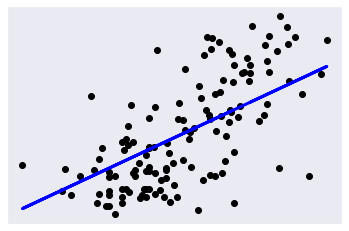

In [59]:
X_train_, X_test_, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3,random_state=42)
model = linear_model.LinearRegression()

for col in cols:
    print(col, ':')

    X_train = X_train_[[col]]
    X_test = X_test_[[col]]
    # Train the model using the training sets
    model.fit(X_train, Y_train)

    # Make predictions using the testing set
    y_pred = model.predict(X_test)

    # The coefficients
    print("Coefficients: \n", model.coef_)
    # The mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(Y_test, y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print("Coefficient of determination: %.2f" % r2_score(Y_test, y_pred))

    # Plot outputs
    plt.scatter(X_test, Y_test, color="black")
    plt.plot(X_test, y_pred, color="blue", linewidth=3)

    plt.xticks(())
    plt.yticks(())


    plt.show()

Лучше всего идет обучение на признаках s5 и bmi. Попробуем пары признаков.

In [99]:
combs = itertools.combinations(cols,2)
for comb in combs:
    print(comb, ':')

    X_train = X_train_[list(comb)]
    X_test = X_test_[list(comb)]
    # Train the model using the training sets
    model.fit(X_train, Y_train)

    # Make predictions using the testing set
    y_pred = model.predict(X_test)

    if (r2_score(Y_test, y_pred))>0.4:
        # The coefficients
        print("Coefficients: \n", model.coef_)
        # The mean squared error
        print("Mean squared error: %.2f" % mean_squared_error(Y_test, y_pred))
        # The coefficient of determination: 1 is perfect prediction
        print("Coefficient of determination: %.2f" % r2_score(Y_test, y_pred))



('age', 'sex') :
('age', 'bmi') :
('age', 'bp') :
('age', 's1') :
('age', 's2') :
('age', 's3') :
('age', 's4') :
('age', 's5') :
Coefficients: 
 [ 89.85546931 832.5426201 ]
Mean squared error: 3061.31
Coefficient of determination: 0.43
('age', 's6') :
('sex', 'bmi') :
('sex', 'bp') :
('sex', 's1') :
('sex', 's2') :
('sex', 's3') :
('sex', 's4') :
('sex', 's5') :
Coefficients: 
 [-100.23688573  868.12832504]
Mean squared error: 3071.24
Coefficient of determination: 0.43
('sex', 's6') :
('bmi', 'bp') :
('bmi', 's1') :
('bmi', 's2') :
('bmi', 's3') :
('bmi', 's4') :
('bmi', 's5') :
Coefficients: 
 [757.49157526 515.60317268]
Mean squared error: 2800.79
Coefficient of determination: 0.48
('bmi', 's6') :
('bp', 's1') :
('bp', 's2') :
('bp', 's3') :
('bp', 's4') :
('bp', 's5') :
Coefficients: 
 [484.50429477 680.3090112 ]
Mean squared error: 3031.50
Coefficient of determination: 0.44
('bp', 's6') :
('s1', 's2') :
('s1', 's3') :
('s1', 's4') :
('s1', 's5') :
Coefficients: 
 [-203.81819183  9

Лучшая пара, как и ожидалось - bmi и s5. Возьмем эту модель.

In [100]:
comb = ('bmi', 's5')
X_train = X_train_[list(comb)]
X_test = X_test_[list(comb)]
# Train the model using the training sets
model.fit(X_train, Y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

if (r2_score(Y_test, y_pred))>0.4:
    # The coefficients
    print("Coefficients: \n", model.coef_)
    # The mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(Y_test, y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print("Coefficient of determination: %.2f" % r2_score(Y_test, y_pred))

Coefficients: 
 [757.49157526 515.60317268]
Mean squared error: 2800.79
Coefficient of determination: 0.48


In [101]:
with open('model.pkl', 'wb') as output:
   	pickle.dump(model, output) #Сохраняем